In [2]:
import os 
from datetime import date
from matplotlib import pyplot as plt
import numpy as np

# we need to set the current path to the directory
# containing the suite3d repository, this hack should
# do the trick
os.chdir(os.path.dirname(os.path.abspath("")))

from suite3d.job import Job
from suite3d import io
from suite3d import plot_utils as plot
from suite3d import file_utils as flu

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:
subjects_dir =   '/mnt/zenneth-subjects/'
expt_info = { 
    'subject':         'TC030',
    'date' :          '2025-02-24',
    'expnum' :         [3],}
n_planes = 9
tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False, get_si_params=False)

data_dir = '/mnt/md0/data/' + exp_str

os.makedirs(data_dir, exist_ok=True)

In [43]:
tifs

['/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00001.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00002.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00003.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00004.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00005.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00006.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00007.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00008.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00009.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00010.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00011.tif',
 '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00012.tif',
 '/m

In [24]:
# Set the mandatory parameters
params = {
    # volume rate
    'fs': io.get_vol_rate(tifs[0]) / 9,
    
    # planes to analyze. 0 is typically the flyback, so we exclude it here
    'planes' : np.array([1,2,3,4,5,6,7,8]), 
    # number of planes recorded by scanimage, including the flyback
    'n_ch_tif' : 9,
    
    # Decay time of the Ca indicator in seconds. 1.3 for GCaMP6s. This example is for GCamP8m
    'tau' : 1.3,
    'lbm' : False, 
    'num_colors' : 2, # how many color channels were recorded by scanimage
    'functional_color_channel' : 0, # which color channel is the functional one
     # voxel size in z,y,x in microns
    'voxel_size_um' : (20, 1.5, 1.5),

    # number of files to use for the initial pass
    # usually, ~500 frames is a good rule of thumb
    # we will just use 200 here for speed
    'n_init_files' :  4,

    # 3D GPU registration - fast! 
    '3d_reg' : False,
    'gpu_reg' : True,
    'nonrigid' : True,
    
    # note : 3D CPU is not supported yet
    'subtract_crosstalk' : False, # turn off some lbm-only features
    'fuse_strips' : False, # turn off some lbm-only features

    
}

In [25]:
# Create the job
job = Job(r'/mnt/md0/runs','tinya-fig', tifs = tifs,
          params=params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/s3d-tinya-fig already exists
Loading job directory for tinya-fig in /mnt/md0/runs
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param fs
      Updating param planes
      Updating param n_ch_tif
      Updating param tau
      Updating param lbm
      Updating param num_colors
      Updating param functional_color_channel
      Updating param voxel_size_um
      Updating param n_init_files
      Updating param 3d_reg
      Updating param gpu_reg
      Updating param nonrigid
      Updating param subtract_crosstalk
      Updating param fuse_strips
   Updated main params file


In [26]:
job.run_init_pass()

   Saved a copy of params at /mnt/md0/runs/s3d-tinya-fig/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-tinya-fig/summary/summary.npy
   Loading init tifs with 9 channels
      Loading tiff 1/4: /mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00005.tif
      Loading tiff 2/4: /mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00010.tif
      Loading tiff 3/4: /mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00015.tif
      Loading tiff 4/4: /mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00020.tif
   Loaded 4 files, total 3.47 GB
   Selecting 500 random frames from the init tif files
   Loaded movie with 500 frames and shape 8, 512, 512
      Enforcing positivity in mean image
   No crosstalk estimation or subtraction
   Using 2d registration
            Loaded mov and masks to GPU for rigid reg in 0.28 sec
            Allocating memory for shifted movie
     

In [27]:
# If you have large tiffs, split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [28]:
# OPTIONAL: load and take a look at the reference image
summary = job.load_summary()
ref_img = summary['ref_img_3d']

# # view 1 plane at a time
# plot.show_img(ref_img[3], figsize=(3,4))

# # interactive 3D viewer
# plot.VolumeViewer(ref_img)


(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f8a8ea4fa90>)

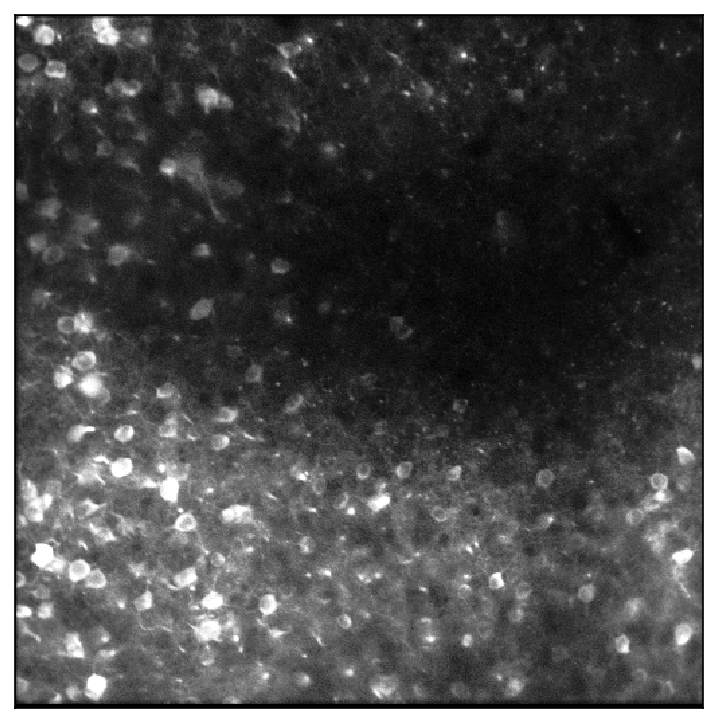

In [29]:
plot.show_img(ref_img[4])

In [30]:
job.register()

      Found dir /mnt/md0/runs/s3d-tinya-fig/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Saved a copy of params at /mnt/md0/runs/s3d-tinya-fig/registered_fused_data
   Updated main params file
   Starting registration: 3D: False, GPU: True
Will analyze 24 tifs in 24 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 163.583 GB, Virtual Available: 355.298 GB, Virtual Used: 147.898 GB, Swap Used: 015.686 GB
Loading Batch 0 of 23
      Loading tiff 1/1: /mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00001.tif
   Loaded 1 files, total 0.87 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 164.456 GB, Virtual Available: 354.425 GB, Virtual Used: 148.771 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 165.325 GB, Virtual Available: 353.556 GB, Virtual Used: 149.640 GB, Swap Used: 015.686 GB
         Memory after thread memory clear

In [31]:
job.params['detection_timebin'] = 5

corr_map = job.calculate_corr_map()

      Found dir /mnt/md0/runs/s3d-tinya-fig/corrmap
      Updating self.dirs tag corrmap
      Found dir /mnt/md0/runs/s3d-tinya-fig/mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-tinya-fig/corrmap
   Updated main params file
   Computing correlation map of movie with 5123 frames, volume shape: 8, 516, 512
      Running batch 1 of 7
      Binning with timebin of size 05
         Timer batch_timebin completed in 0.001 sec


/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.879 sec
         Timer batch_setup completed in 0.353 sec
         Timer batch_edgecrop completed in 0.054 sec
         Timer accum_meanmeax completed in 0.270 sec
         Timer batch_rolling_mean_filt completed in 0.245 sec
         Timer batch_accum_sdmov completed in 0.766 sec
         Timer batch_norm_sdmov completed in 0.128 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.015 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.462 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.300 sec
         Timer dtu_cleanup completed in 0.514 sec
         Timer batch_filt_reduce completed in 4.291 sec
         Timer batch_accum_vmap completed in 0.007 sec
         Timer batch completed in 6.646 sec
         Timer save completed in 0.997 sec
      Running batch 2 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.858 sec
         Timer batch_setup completed in 0.359 sec
         Timer batch_edgecrop completed in 0.028 sec
         Timer accum_meanmeax completed in 0.286 sec
         Timer batch_rolling_mean_filt completed in 0.251 sec
         Timer batch_accum_sdmov completed in 0.777 sec
         Timer batch_norm_sdmov completed in 0.131 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.022 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.515 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.321 sec
         Timer dtu_cleanup completed in 0.517 sec
         Timer batch_filt_reduce completed in 4.376 sec
         Timer batch_accum_vmap completed in 0.010 sec
         Timer batch completed in 6.863 sec
         Timer save completed in 0.979 sec
      Running batch 3 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.806 sec
         Timer batch_setup completed in 0.359 sec
         Timer batch_edgecrop completed in 0.057 sec
         Timer accum_meanmeax completed in 0.287 sec
         Timer batch_rolling_mean_filt completed in 0.253 sec
         Timer batch_accum_sdmov completed in 0.782 sec
         Timer batch_norm_sdmov completed in 0.131 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.031 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.442 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.315 sec
         Timer dtu_cleanup completed in 0.533 sec
         Timer batch_filt_reduce completed in 4.322 sec
         Timer batch_accum_vmap completed in 0.011 sec
         Timer batch completed in 6.859 sec
         Timer save completed in 0.964 sec
      Running batch 4 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 2.141 sec
         Timer batch_setup completed in 0.358 sec
         Timer batch_edgecrop completed in 0.057 sec
         Timer accum_meanmeax completed in 0.291 sec
         Timer batch_rolling_mean_filt completed in 0.259 sec
         Timer batch_accum_sdmov completed in 0.787 sec
         Timer batch_norm_sdmov completed in 0.131 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.048 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.435 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.307 sec
         Timer dtu_cleanup completed in 0.540 sec
         Timer batch_filt_reduce completed in 4.333 sec
         Timer batch_accum_vmap completed in 0.011 sec
         Timer batch completed in 6.873 sec
         Timer save completed in 0.958 sec
      Running batch 5 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.882 sec
         Timer batch_setup completed in 0.355 sec
         Timer batch_edgecrop completed in 0.054 sec
         Timer accum_meanmeax completed in 0.277 sec
         Timer batch_rolling_mean_filt completed in 0.245 sec
         Timer batch_accum_sdmov completed in 0.781 sec
         Timer batch_norm_sdmov completed in 0.127 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.021 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.440 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.309 sec
         Timer dtu_cleanup completed in 0.514 sec
         Timer batch_filt_reduce completed in 4.286 sec
         Timer batch_accum_vmap completed in 0.011 sec
         Timer batch completed in 6.824 sec
         Timer save completed in 0.961 sec
      Running batch 6 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.912 sec
         Timer batch_setup completed in 0.351 sec
         Timer batch_edgecrop completed in 0.027 sec
         Timer accum_meanmeax completed in 0.278 sec
         Timer batch_rolling_mean_filt completed in 0.249 sec
         Timer batch_accum_sdmov completed in 0.770 sec
         Timer batch_norm_sdmov completed in 0.130 sec
         Loading movie of size (160, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 1.011 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 2.454 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.297 sec
         Timer dtu_cleanup completed in 0.507 sec
         Timer batch_filt_reduce completed in 4.270 sec
         Timer batch_accum_vmap completed in 0.010 sec
         Timer batch completed in 6.763 sec
         Timer save completed in 0.987 sec
      Running batch 7 of 7
      Binning with

/tmp/ipykernel_707182/2139469039.py:3: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  corr_map = job.calculate_corr_map()


         Timer prep completed in 1.315 sec
         Timer batch_setup completed in 0.141 sec
         Timer batch_edgecrop completed in 0.022 sec
         Timer accum_meanmeax completed in 0.121 sec
         Timer batch_rolling_mean_filt completed in 0.099 sec
         Timer batch_accum_sdmov completed in 0.312 sec
         Timer batch_norm_sdmov completed in 0.053 sec
         Loading movie of size (64, 8, 516, 512) into shared memory
         Timer dtu_shmem completed in 0.404 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 1.816 sec
         Reducing filtered movie to compute correlation map
         Timer dtu_vmap completed in 0.120 sec
         Timer dtu_cleanup completed in 0.210 sec
         Timer batch_filt_reduce completed in 2.551 sec
         Timer batch_accum_vmap completed in 0.010 sec
         Timer batch completed in 3.942 sec
         Timer save completed in 0.394 sec


In [32]:
res = job.load_corr_map_results()
vmap = res['vmap']

In [38]:
job.params['max_pix'] = 5000

job.params['patch_size_xy'] = (550, 550)
job.params['extend_thresh'] = 0.05
# for speed, only segment a single patch
job.segment_rois()

      Found dir /mnt/md0/runs/s3d-tinya-fig/segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-tinya-fig/segmentation
   Updated main params file
      Found dir /mnt/md0/runs/s3d-tinya-fig/rois
      Updating self.dirs tag rois
   Saving results to /mnt/md0/runs/s3d-tinya-fig/segmentation and /mnt/md0/runs/s3d-tinya-fig/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'vmap_raw', 'all_params'])
   Detecting from patch 1 / 1
      Found dir /mnt/md0/runs/s3d-tinya-fig/segmentation/patch-0000
         Loading 4.03 GB movie to memory, shape: (1024, 8, 516, 512) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 0.100 and Th2: 5.000
         Iter 0000: running 16 ROIs in parallel
         Added cell 1 at 00, 395, 174, peak: 6.923, thresh: 5.000, 211 frames, 2550 pixels
         Added cell 2 at 02, 413, 404, peak: 6.721, thresh: 5.000, 224 frames, 3689 pixels
         A

'/mnt/md0/runs/s3d-tinya-fig/rois'

In [39]:
job.params['max_pix'] = 5000

job.params['patch_size_xy'] = (550, 550)
job.params['extend_thresh'] = 0.075
# for speed, only segment a single patch
job.segment_rois(output_dir_name='rois2')

   Created dir /mnt/md0/runs/s3d-tinya-fig/rois2 with tag rois2
      Updating self.dirs tag rois2
   Created dir /mnt/md0/runs/s3d-tinya-fig/rois2/segmentation with tag rois2-segmentation
      Updating self.dirs tag rois2-segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-tinya-fig/rois2/segmentation
   Updated main params file
   Created dir /mnt/md0/runs/s3d-tinya-fig/rois2/rois with tag rois2-rois
      Updating self.dirs tag rois2-rois
   Saving results to /mnt/md0/runs/s3d-tinya-fig/rois2/segmentation and /mnt/md0/runs/s3d-tinya-fig/rois2/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'vmap_raw', 'all_params'])
   Detecting from patch 1 / 1
   Created dir /mnt/md0/runs/s3d-tinya-fig/rois2/segmentation/patch-0000 with tag rois2-segmentation-patch-0000
         Loading 4.03 GB movie to memory, shape: (1024, 8, 516, 512) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 0.100 and Th2: 5.000
         

'/mnt/md0/runs/s3d-tinya-fig/rois2/rois'

In [41]:
job.compute_npil_masks(stats_dir = job.dirs['rois2-rois'])
traces = job.extract_and_deconvolve(stats_dir=job.dirs['rois2-rois'])

   Updated main params file
   Movie shape: (8, 5123, 516, 512)
1395
   Extracting 1395 valid cells, and saving cell flags to /mnt/md0/runs/s3d-tinya-fig/rois2/rois/iscell_extracted.npy
   Extracting activity
         Will extract in 11 batches of 500
   Saving intermediate results to /mnt/md0/runs/s3d-tinya-fig/rois2/rois
   Deconvolving
   Saving to /mnt/md0/runs/s3d-tinya-fig/rois2/rois


In [42]:
job.export_results('/mnt/zeytin-f1/s3d-results/',result_dir_name='rois2-rois')

   Created dir /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig to export results
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/stats_small.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/info.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/F.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/spks.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/Fneu.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois2/rois/iscell.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig/s3d-params.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig/frames.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig/stats.npy
      Saved stats.npy to /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig/info.npy
      Saved info.npy to /mnt/zeytin-f1/s3d-results/s3d-results-tinya-fig
      Overwrit

In [ ]:
job.

To take a look at the outputs in napari, navigate to the suite3d directory in a command shell and run the following:
```
python curation.py curation --output_dir /path/to/output/rois
```